<a href="https://www.kaggle.com/code/lalit7881/gen-z-slang-evolution-tracker-2020-2025?scriptVersionId=293046505" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genz-slang-evolution-tracker-2020-2025/genz_slang_usage_2020_2025.csv


## 1️⃣ Problem Definition & Objective
Problem Statement

Gen Z slang evolves rapidly across platforms and time. Understanding which slang terms emerge, peak, and fade can help in:

Trend analysis

Social media insights

Marketing and content strategy

Cultural research

Objective

Analyze slang usage trends from 2020 to 2025

Identify popular slang terms

Understand platform-wise and category-wise patterns

Study the lifecycle phases of slang (emerging, peak, declining)

In [2]:
data_path = "/kaggle/input/genz-slang-evolution-tracker-2020-2025/genz_slang_usage_2020_2025.csv"
df = pd.read_csv(data_path)

In [3]:
df.head()

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,0.603,negative,-0.740,False,18,2,5,0.004,False,153
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,0.603,negative,-0.978,False,24,1,2,0.004,False,153
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,0.552,positive,0.384,False,121,1,0,0.013,False,92
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,0.551,neutral,0.167,False,47,2,1,0.006,False,214
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,0.551,positive,0.874,False,18,0,14,0.006,False,214


In [4]:
df.shape

(535396, 22)

In [5]:
df.columns

Index(['record_id', 'timestamp', 'slang_term', 'term_category', 'term_meaning',
       'origin_platform', 'usage_platform', 'region', 'user_id',
       'user_age_group', 'usage_context', 'lifecycle_phase', 'intensity_score',
       'sentiment', 'sentiment_score', 'ironic_usage', 'likes', 'shares',
       'comments', 'virality_score', 'is_viral', 'days_since_emergence'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535396 entries, 0 to 535395
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   record_id             535396 non-null  int64  
 1   timestamp             535396 non-null  object 
 2   slang_term            535396 non-null  object 
 3   term_category         535396 non-null  object 
 4   term_meaning          535396 non-null  object 
 5   origin_platform       535396 non-null  object 
 6   usage_platform        535396 non-null  object 
 7   region                535396 non-null  object 
 8   user_id               535396 non-null  object 
 9   user_age_group        535396 non-null  object 
 10  usage_context         535396 non-null  object 
 11  lifecycle_phase       535396 non-null  object 
 12  intensity_score       535396 non-null  float64
 13  sentiment             535396 non-null  object 
 14  sentiment_score       535396 non-null  float64
 15  

In [7]:
df.describe(include="all")

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence
count,535396.000000,535396,535396,535396,535396,535396,535396,535396,535396,535396,...,535396.000000,535396,535396.000000,535396,535396.000000,535396.000000,535396.000000,535396.000000,535396,535396.000000
unique,NaN,534320,46,17,46,6,7,22,328571,5,...,NaN,3,NaN,2,NaN,NaN,NaN,NaN,2,NaN
top,NaN,2024-11-20 21:23:54,slay,approval,doing something exceptionally well,TikTok,TikTok,California,user_278598,18-24,...,NaN,positive,NaN,False,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,3,19004,106901,19004,278028,214638,64047,8,187264,...,NaN,254777,NaN,477012,NaN,NaN,NaN,NaN,534679,NaN
mean,267697.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.656799,NaN,0.175213,NaN,61.483362,3.298273,7.009772,0.009765,NaN,474.526909
std,154555.656698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.229561,NaN,0.542696,NaN,227.016926,16.171007,30.638933,0.022437,NaN,269.419917
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.090000,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,133848.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.505000,NaN,-0.212000,NaN,9.000000,0.000000,1.000000,0.003000,NaN,261.000000
50%,267697.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.687000,NaN,0.246000,NaN,28.000000,1.000000,3.000000,0.006000,NaN,446.000000
75%,401546.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.844000,NaN,0.633000,NaN,71.000000,4.000000,8.000000,0.012000,NaN,655.000000


In [8]:
df.isnull().sum()

record_id               0
timestamp               0
slang_term              0
term_category           0
term_meaning            0
origin_platform         0
usage_platform          0
region                  0
user_id                 0
user_age_group          0
usage_context           0
lifecycle_phase         0
intensity_score         0
sentiment               0
sentiment_score         0
ironic_usage            0
likes                   0
shares                  0
comments                0
virality_score          0
is_viral                0
days_since_emergence    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.dropna(inplace=True)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year

In [13]:
text_cols = [
    'slang_term', 'term_category', 'origin_platform',
    'usage_platform', 'region', 'usage_context', 'lifecycle_phase'
]

for col in text_cols:
    df[col] = df[col].str.lower().str.strip()


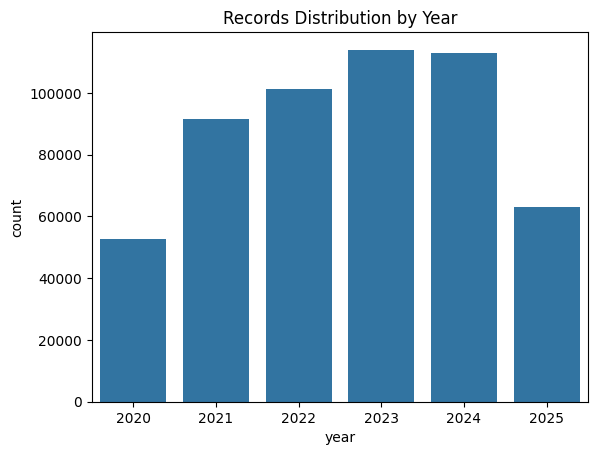

In [14]:
sns.countplot(x='year', data=df)
plt.title("Records Distribution by Year")
plt.show()

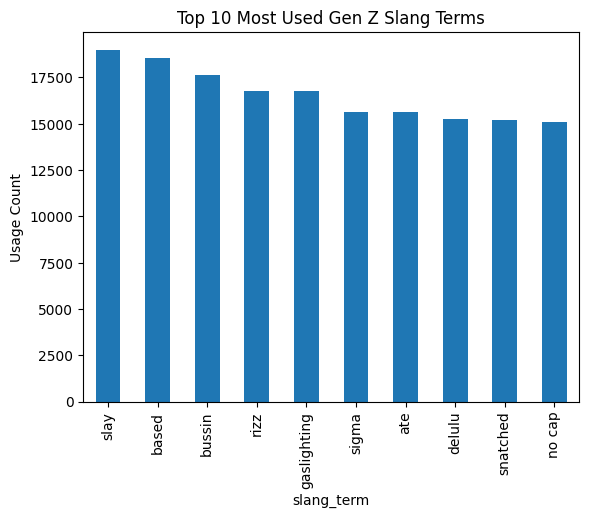

In [15]:
top_slang = df.groupby('slang_term')['record_id'].count().sort_values(ascending=False).head(10)

top_slang.plot(kind='bar')
plt.title("Top 10 Most Used Gen Z Slang Terms")
plt.ylabel("Usage Count")
plt.show()


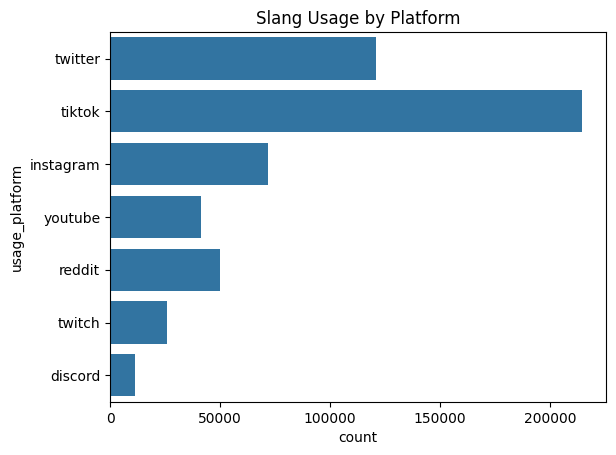

In [16]:
sns.countplot(y='usage_platform', data=df)
plt.title("Slang Usage by Platform")
plt.show()

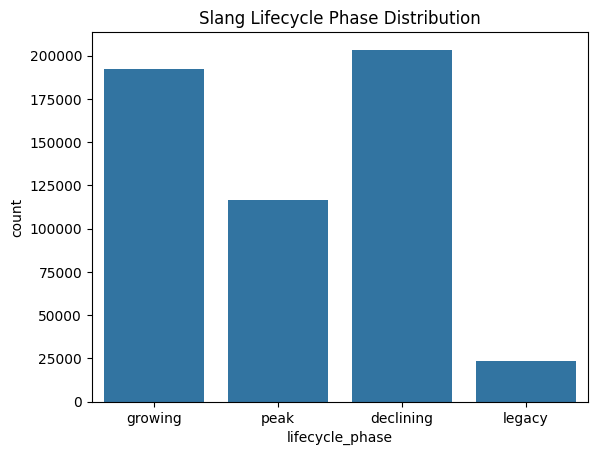

In [17]:
sns.countplot(x='lifecycle_phase', data=df)
plt.title("Slang Lifecycle Phase Distribution")
plt.show()

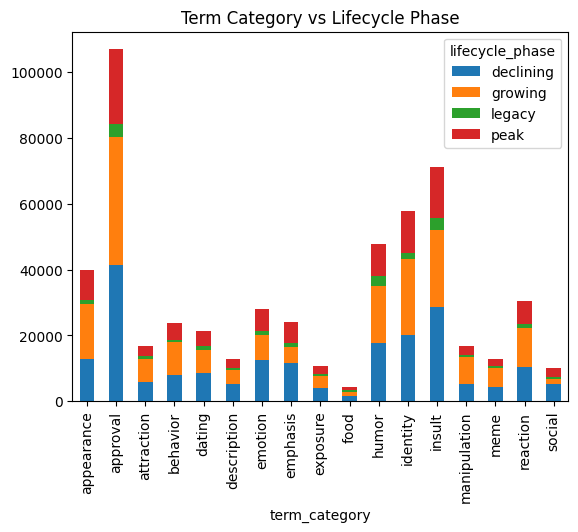

In [18]:
pivot_life = pd.crosstab(df['term_category'], df['lifecycle_phase'])

pivot_life.plot(kind='bar', stacked=True)
plt.title("Term Category vs Lifecycle Phase")
plt.show()


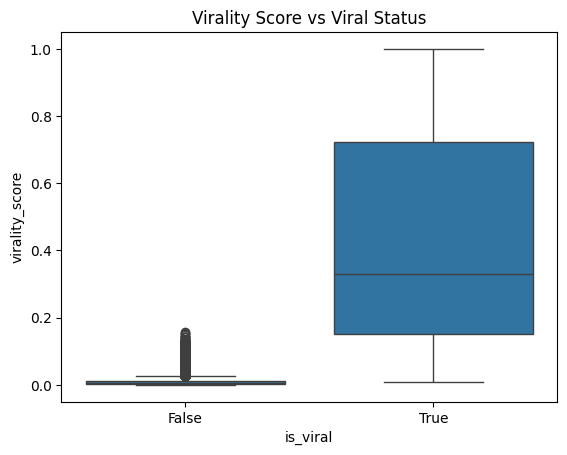

In [19]:
sns.boxplot(x='is_viral', y='virality_score', data=df)
plt.title("Virality Score vs Viral Status")
plt.show()


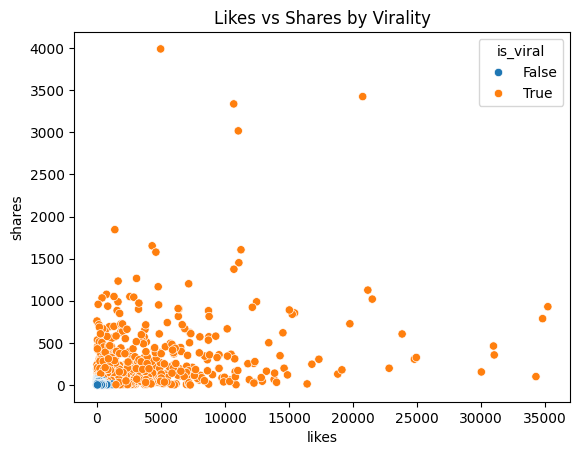

In [20]:
sns.scatterplot(
    x='likes',
    y='shares',
    hue='is_viral',
    data=df
)
plt.title("Likes vs Shares by Virality")
plt.show()


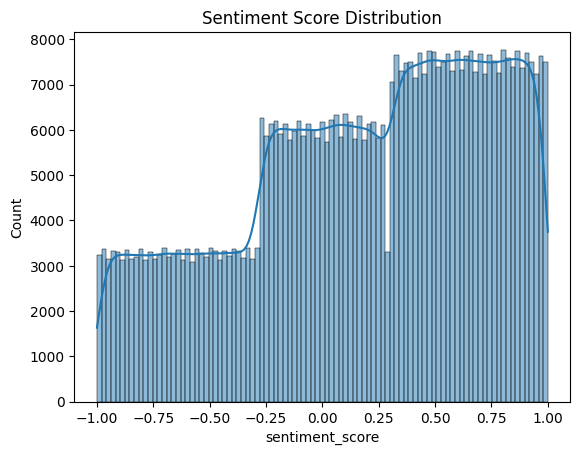

In [21]:
sns.histplot(df['sentiment_score'], kde=True)
plt.title("Sentiment Score Distribution")
plt.show()


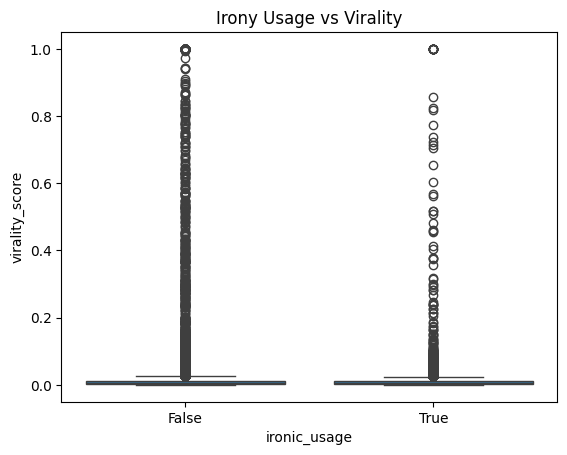

In [22]:
sns.boxplot(x='ironic_usage', y='virality_score', data=df)
plt.title("Irony Usage vs Virality")
plt.show()


In [23]:
features = [
    'likes', 'shares', 'comments',
    'sentiment_score', 'intensity_score',
    'days_since_emergence'
]
target = 'is_viral'


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9998412401942472
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    106937
        True       1.00      0.88      0.94       143

    accuracy                           1.00    107080
   macro avg       1.00      0.94      0.97    107080
weighted avg       1.00      1.00      1.00    107080



## THank you...pls upvote!!!!